## Lab 1 Data science cource

### Manuel Felipe Pineda



#### Objetivo

Repasar los conceptos basicos de álgebra matricial, probabilidades y estadística orientados al analisis de datos.

------------------

1. Descargue una base de datos de su interés y describa brevemente qué tipos de datos contiene y qué fenómeno está describiendo.

    R: Es una base de datos construida por freecodecamp y codenewbie donde entrevistan 15,000 personas que están aprendiendo a programar.
    Su objetivo es entender la motivación de las personas para aprender a programar, cómo lo están haciendo, su demografía y el background socioeconómico.



-------------

2. Elija mínimo 10 variables y guardelas en una matriz de datos.

In [279]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys


In [280]:
data = pd.read_csv("lab1-db/lab1.csv", sep=',', dtype={21: np.str, 57: np.str})
variables = ["Gender", "IsUnderEmployed", "MonthsProgramming",
             "ExpectedEarning", "ResourceUdacity", "CodeEventNodeSchool",
             "CityPopulation", "HoursLearning", "LanguageAtHome", "ResourceHackerRank"]


arr = np.array(data["Age"].values, dtype = np.float64)

columns = arr.shape[0]

for i in variables:
    arr = np.append(arr, data[i].values, axis=0)

rows = arr.shape[0] // columns
arr = arr.reshape(rows, columns)

arr[0] = np.array(arr[0], dtype = np.float64)


# Convert all the strings to floats.
# Convert all the nan's to 0
arr[arr == 'male'] = 0.0
arr[arr == 'female'] = 1.0
arr[arr == 'genderqueer'] = 2
arr[arr == 'agender'] = 3
arr[arr == 'trans'] = 3
arr[9][arr[9] != 'English'] = 0.0
arr[9][arr[9] == 'English'] = 1.0
arr[arr == 'more than 1 million'] = 1e6
arr[arr == 'between 100,000 and 1 million'] = 1e5
arr[arr == 'less than 100,000'] = 1
arr = np.array(arr, dtype = np.float64)
arr[np.isnan(arr)] = 0

print(arr)


[[ 28.  22.  19. ...,  37.  26.  22.]
 [  0.   0.   0. ...,   0.   0.   1.]
 [  1.   1.   0. ...,   1.   1.   0.]
 ..., 
 [ 30.  30.  20. ...,  14.  10.   2.]
 [  1.   1.   1. ...,   1.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]]


--------

3. Con base en la matriz de datos capturada, realice los siguientes experimentos:

    - Determine al singularidad de la matriz.

    R: En este caso es fácil observar que la matriz es singular ya que la matriz no es cuadrada. En el caso de que fuera cuadrada, debería evaluarse el rango de la misma y verificar que fuera igual al número de filas (o columnas).

In [281]:
print ('Is singular?: ', arr.shape[0] != arr.shape[1])

Is singular?:  True


 - Determine si la matriz es linealmente independiente. ¿Cual es el rango de la matriz?
 
     R: La matriz es linealmente independiente dado que la cantidad de variables que se están alanizando es igual a su rango

In [282]:
print('The rank of the matrix is:', np.linalg.matrix_rank(arr))
print('Number of variables:', arr.shape[0])

The rank of the matrix is: 11
Number of variables: 11


- Calcule la inversa de la matriz. ¿Es posible calcularla? ¿Por qué?
    R: No se puede calcular la inversa porque la matriz es singular.
       
- En Matlab, ¿cuál es la diferencia entre las funciones inv() y pinv()?
   R:   
     __inv__ calcula la inversa de una matriz siguiendo de manera estricta todas las propiedades que esto implica.
     
     __pinv__ calcula la pseudo inversa (o inversa generalizada), la cual es una matriz que cumple *algunas* de las propiedades de la inversa, pero no todas. Resulta útil (por ejemplo) cuando se trabaja con matrices no cuadradas.
             
- Calcule el determinante de la matriz:
   R: En este caso no se puede debido a que la matriz no es cuadrada.
   Se calcula con el comando np.linalg.det.
   
       print('Determinant of matrix:', np.linalg.det(arr))
     
- Estime la norma de Frobenius de la matriz.
        

In [207]:
print('Frobenius norm of matrix:', np.linalg.norm(arr))

Frobenius norm of matrix: 75034677.2444


---------------------
Calcule la media y la varianza de cada una de las variables de su matriz de datos y grafíquelas. 
Ver comandos mean, var y plot de MatLab. 

¿Qué puede inferir a partir de dichos valores con respeto al problema de interés de su base de datos?

In [283]:
print('Mean of all elements', np.mean(arr))
print('Mean by columns', np.mean(arr, axis = 1))
print('Var of all elements', np.var(arr))
print('Var by columns', np.var(arr, axis = 1))

Mean of all elements 37115.3295716
Mean by columns [  2.54266965e+01   2.04481434e-01   2.33418694e-01   2.34823944e+01
   2.08989613e+04   2.11651729e-01   3.07298335e-02   3.87304940e+05
   1.46581946e+01   4.74967990e-01   1.92061460e-03]
Var of all elements 31390481580.8
Var by columns [  1.66183039e+02   1.99544577e-01   1.78934407e-01   2.37032357e+03
   1.03779963e+09   1.66855274e-01   2.97855109e-02   2.08968635e+11
   2.04663387e+02   2.49373398e-01   1.91692584e-03]


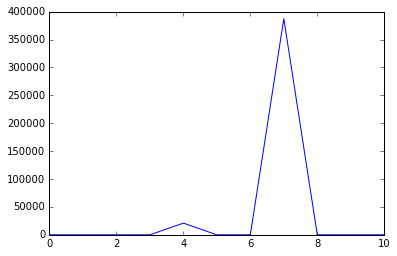

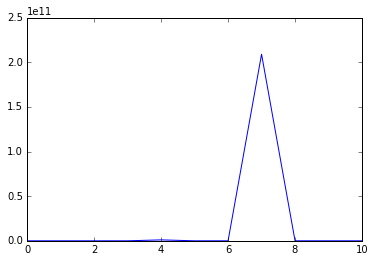

In [284]:
plt.plot(np.mean(arr, axis=1))
plt.show()
plt.plot(np.var(arr, axis=1))
plt.show()

Hasta el momento es posible ver que los datos no están normalizados, por ejemplo la variable 7 ("CityPopulation") es muchísimo más grande que las demás y esto dificulta su análisis. 

--------

Genere la matriz cuadrada C∈RL×L, siendo L el numero de variables analizadas, con elementos Cij = cov (xi, xj), siendo xi, xj ∈RT un par de vectores cuyos elementos contienen los valores de las variables i y j para T muestras de la base de datos.
    
    
Analice la matriz de covarianza C con respecto al problema de estudio (mínimo estudie la covarianza entre T = 10 variables).

Ver comando cov en MatLab.

In [285]:
covariance = np.cov(arr)
# plt.pcolor(covariance)
# plt.colorbar()
# plt.show()

Estime la inversa de la matriz C. ¿Es posible calcularla? ¿Por qué?.

   R: La inversa de la matriz C siempre existe (conocida como matriz de precision) debido a las propiedades de las matrices de covarianza[1](https://en.wikipedia.org/wiki/Covariance_matrix#Properties) (principalmente al hecho de que son symetricas y positivas-semidefinidas[2](https://en.wikipedia.org/wiki/Positive-definite_matrix#Further_properties))
        
        ref: https://en.wikipedia.org/wiki/Covariance_matrix#Properties
             https://en.wikipedia.org/wiki/Positive-definite_matrix#Further_properties

In [286]:
inv_cov = np.linalg.inv(covariance)

-----------------------
Dados los vectores de datos xi y xj para un par de variables i, j, grafique el histograma de cada una de dichas variables. Ver comando hist de Matlab. 
    
¿Que relación tiene dicho gráfico con la probabilidad marginal de cada una de las variables?
   
   R: Dicho histograma tiene una relación directa con la probabilidad de las variables, por ejemplo al graficar la edad, se nota que es "más probable" que las personas que están aprendiendo a programartengan entre 20 y 30 años de edad.
   
   Este gráfico puede ser de gran utilidad si se desea conocer la distribución de probabilidad que siguen las variables, por ejemplo al graficar la edad y las horas de aprendizaje, se nota que tienen formas diferentes.

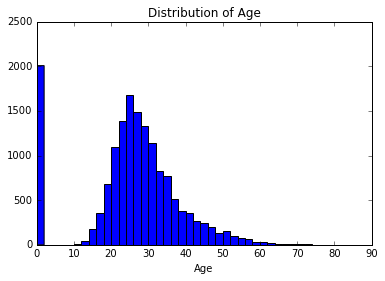

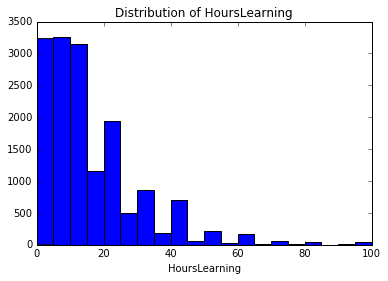

In [287]:
plt.xlabel("Age")
plt.title("Distribution of Age")
plt.hist(arr[0], bins=43)
plt.show()

plt.xlabel("HoursLearning")
plt.title("Distribution of HoursLearning")
plt.hist(arr[8], bins=20)
plt.show()

-----------------------

Estime la media y la varianza para un par de variables xi y xj , calcule la funcion de densidad de probabilidad de cada variable utilizando un modelo Gaussiano univariado. Para ello, evalúe cada uno de los valores de xi y xj sobre una función gaussiana univariada con media  μ = E (xi) y varianza σ = var(xi). Ver la funcion normpdf.
        
        
Grafique la función de densidad de probabilidad  y analice dicha grafica.

Params for age: mu:  29.1754205539  sigma:  81.3132370321


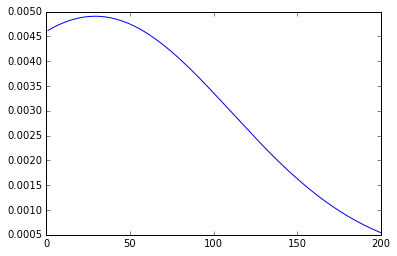

In [288]:
x = np.trim_zeros(np.sort(arr[0]))
mu = np.mean(x)
sigma = np.var(x)

print("Params for age: mu: ", mu ," sigma: " , sigma)
import matplotlib.mlab as mlab

x_axis = np.arange(1, 200, 0.001)
plt.plot(x_axis, mlab.normpdf(x_axis, mu, sigma))

plt.show()

Params for age with zeros: mu:  25.4266965429  sigma:  166.183038895


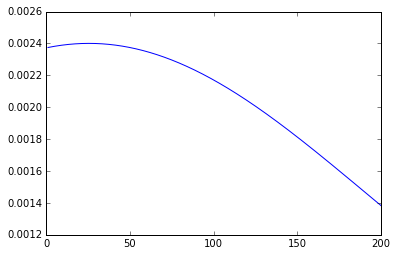

In [289]:
x = arr[0]
mu = np.mean(x)
sigma = np.var(x)

print("Params for age with zeros: mu: ", mu ," sigma: " , sigma)

x_axis = np.arange(1, 200, 0.001)
plt.plot(x_axis, mlab.normpdf(x_axis, mu, sigma))

plt.show()

En esta sección se puede resaltar un aspecto muy interesante de los datos, dadas las dos gráficas anteriores se puede notar que la primera da una mejor estimación de los parámetros (tiene un valor de sigma más pequeño) dado que fueron removidos todos los datos iguales a cero. Esto se realizó porque se considera que dichos datos no son reales sino que fueron resultado de la toma de datos.

Params for HoursLearning: mu:  14.6581946223  sigma:  204.663386753


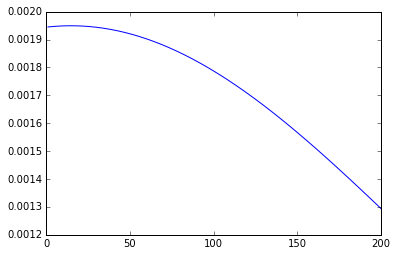

In [290]:
x = arr[8]
mu = np.mean(x)
sigma = np.var(x)

print("Params for HoursLearning: mu: ", mu ," sigma: " , sigma)

x_axis = np.arange(1, 200, 0.001)
plt.plot(x_axis, mlab.normpdf(x_axis, mu, sigma))

plt.show()

### Discusión adicional.

Vale la pena resaltar la importancia de una etapa de filtrado de datos antes de realizar los análisis dado que los datos en crudo tienen muchísimas inconsistencias, por ejemplo valores faltantes. También es importante decidir en esa etapa como mapear los valores *no-numéricos* a valores numéricos.